<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/SVM/SVM(salary_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# prompt: upload a file in colab.

from google.colab import files

uploaded = files.upload()



Saving SalaryData_Train.csv to SalaryData_Train.csv


In [ ]:
df_train = pd.read_csv("SalaryData_Train.csv")
df_train.shape

(30161, 14)

In [ ]:
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [ ]:
df_test = pd.read_csv("SalaryData_Test.csv")
df_train.shape

(30161, 14)

In [ ]:
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [ ]:
# label encoding training data...
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_train =  df_train.apply(LabelEncoder().fit_transform)

In [ ]:
df_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   22          5          9           12              4           0   
1   33          4          9           12              2           3   
2   21          2         11            8              0           5   
3   36          2          1            6              2           5   
4   11          2          9           12              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1           24            0            39      37   
1             0     4    1            0            0            12      37   
2             1     4    1            0            0            39      37   
3             0     2    1            0            0            39      37   
4             5     2    0            0            0            39       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
# Label encoding of the tesing data ....

df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0    8          2          1            6              4           6   
1   21          2         11            8              2           4   
2   11          1          7           11              2          10   
3   27          2         15            9              2           6   
4   17          2          0            5              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            39      37   
1             0     4    1            0            0            49      37   
2             0     4    1            0            0            39      37   
3             0     2    1           87            0            39      37   
4             1     4    1            0            0            29      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [ ]:
# dropping elements..
drop_elements =['education','native','Salary']
X = df_train.drop(drop_elements, axis=1)
Y = df_train['Salary']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.33,random_state=42)

In [ ]:
X

age  workclass  educationno  maritalstatus  occupation  relationship  \
0       22          5           12              4           0             1   
1       33          4           12              2           3             0   
2       21          2            8              0           5             1   
3       36          2            6              2           5             0   
4       11          2           12              2           9             5   
...    ...        ...          ...            ...         ...           ...   
30156   10          2           11              2          12             5   
30157   23          2            8              2           6             0   
30158   41          2            8              6           0             4   
30159    5          2            8              4           0             3   
30160   35          3            8              2           3             5   

       race  sex  capitalgain  capitalloss  hoursperweek  
0         4    1           24            0            39  
1         4    1            0            0            12  
2         4    1            0            0            39  
3         2    1            0            0            39  
4         2    0            0            0            39  
...     ...  ...          ...          ...           ...  
30156     4    0            0            0            37  
30157     4    1            0            0            39  
30158     4    0            0            0            39  
30159     4    1            0            0            19  
30160     4    0          107            0            39  

[30161 rows x 11 columns]

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [ ]:
X_train

age  workclass  educationno  maritalstatus  occupation  relationship  \
28066   49          5            8              2           3             0   
8174    16          2           13              2          12             0   
3497     6          2           12              4           3             3   
12072   11          2           12              4           3             1   
2725    10          2            9              4          11             1   
...    ...        ...          ...            ...         ...           ...   
29802   19          2           11              2           3             5   
5390    24          4            9              2           6             0   
860     20          2            8              2           2             0   
15795   39          4            6              2           7             5   
23654   28          2            9              5           2             1   

       race  sex  capitalgain  capitalloss  hoursperweek  
28066     4    1            0           42            39  
8174      4    1            0            0            14  
3497      4    0            0            0            39  
12072     4    0            0            0            59  
2725      4    1            0            0            19  
...     ...  ...          ...          ...           ...  
29802     4    0            0            0            36  
5390      4    1           49            0            39  
860       4    1            0            0            93  
15795     4    0            0            0            39  
23654     4    1            0            0            40  

[20207 rows x 11 columns]

In [ ]:
X_test

age  workclass  educationno  maritalstatus  occupation  relationship  \
217     11          2           14              4           9             1   
24912   24          2            8              2           2             0   
17780   36          2            8              2           7             0   
12484   14          2            8              2           2             0   
8890    17          1           12              3           9             1   
...    ...        ...          ...            ...         ...           ...   
1821    18          2            9              4          11             1   
23246   29          4            8              2           3             0   
13730   39          2            9              2          13             0   
14920   31          2           11              2          13             0   
22274   43          2            9              2           2             0   

       race  sex  capitalgain  capitalloss  hoursperweek  
217       4    1            0            0            54  
24912     1    1            0            0            39  
17780     4    1            0            0            49  
12484     4    1            0            0            44  
8890      4    0            0            0            39  
...     ...  ...          ...          ...           ...  
1821      4    0            0            0            39  
23246     4    1            0            0            49  
13730     2    1            0            0            39  
14920     4    1            0            0            43  
22274     4    1            0            0            64  

[9954 rows x 11 columns]

In [ ]:
Y_train

28066    1
8174     0
3497     0
12072    0
2725     0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: Salary, Length: 20207, dtype: int64

In [ ]:
Y_test

217      1
24912    0
17780    1
12484    0
8890     0
        ..
1821     0
23246    0
13730    0
14920    0
22274    0
Name: Salary, Length: 9954, dtype: int64

In [ ]:
# grid search CV
clf = SVC()

In [ ]:
param_grid =[{'kernal':['rbf'],'gamma':[50.5,10,0.5],'c':[14,13,12,11,10,0,0.01,0.001]}]

In [ ]:
gav = GridSearchCV(clf,param_grid,cv=10)

In [ ]:
gav.set_params,gav.score

(<bound method BaseEstimator.set_params of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>,
 <bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
              param_grid=[{'c': [14, 13, 12, 11, 10, 0, 0.01, 0.001],
                           'gamma': [50.5, 10, 0.5], 'kernal': ['rbf']}])>)

In [ ]:
clf = SVC(C=15,gamma=50)

In [ ]:
clf.fit(X_train,Y_train)

SVC(C=15, gamma=50)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test,Y_pred)*100

In [ ]:
print("Accuracy=",acc)

Accuracy= 75.46714888487041


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[7304,  162],
       [2280,  208]])

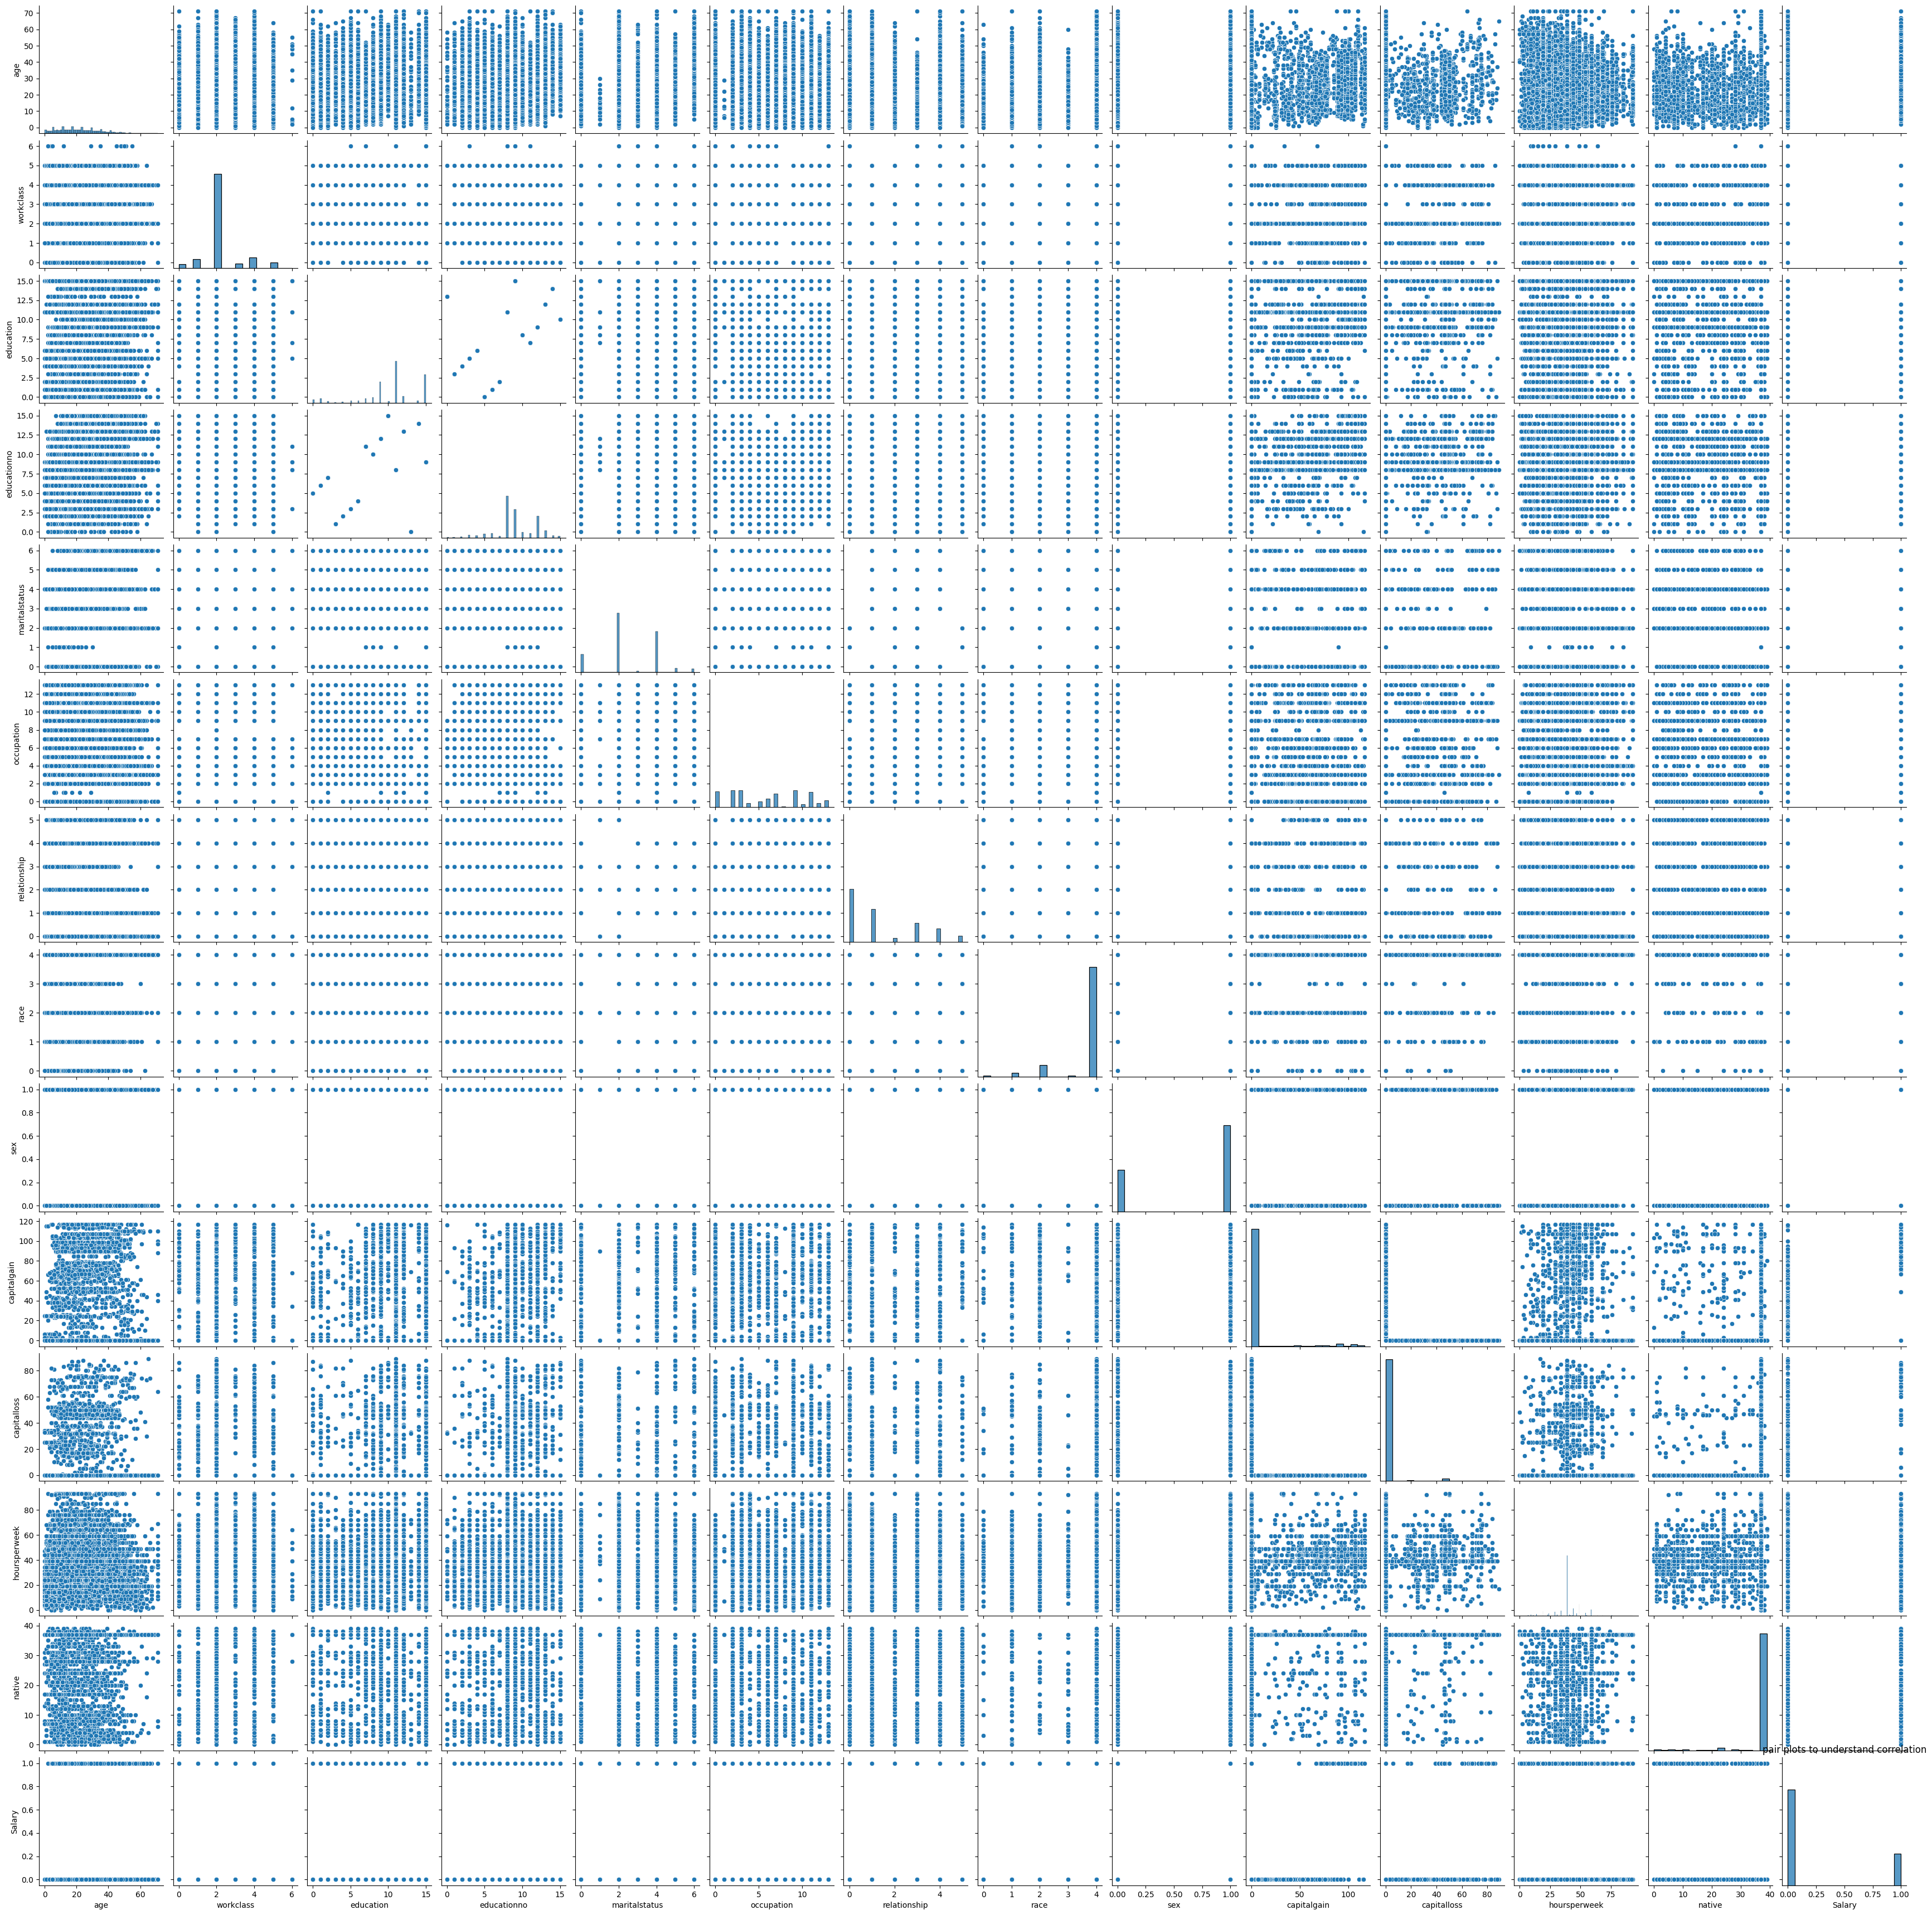

In [ ]:
#plotting features
import seaborn as sns
sns.pairplot(df_train)
plt.title('pair plots to understand correlation')
plt.show()

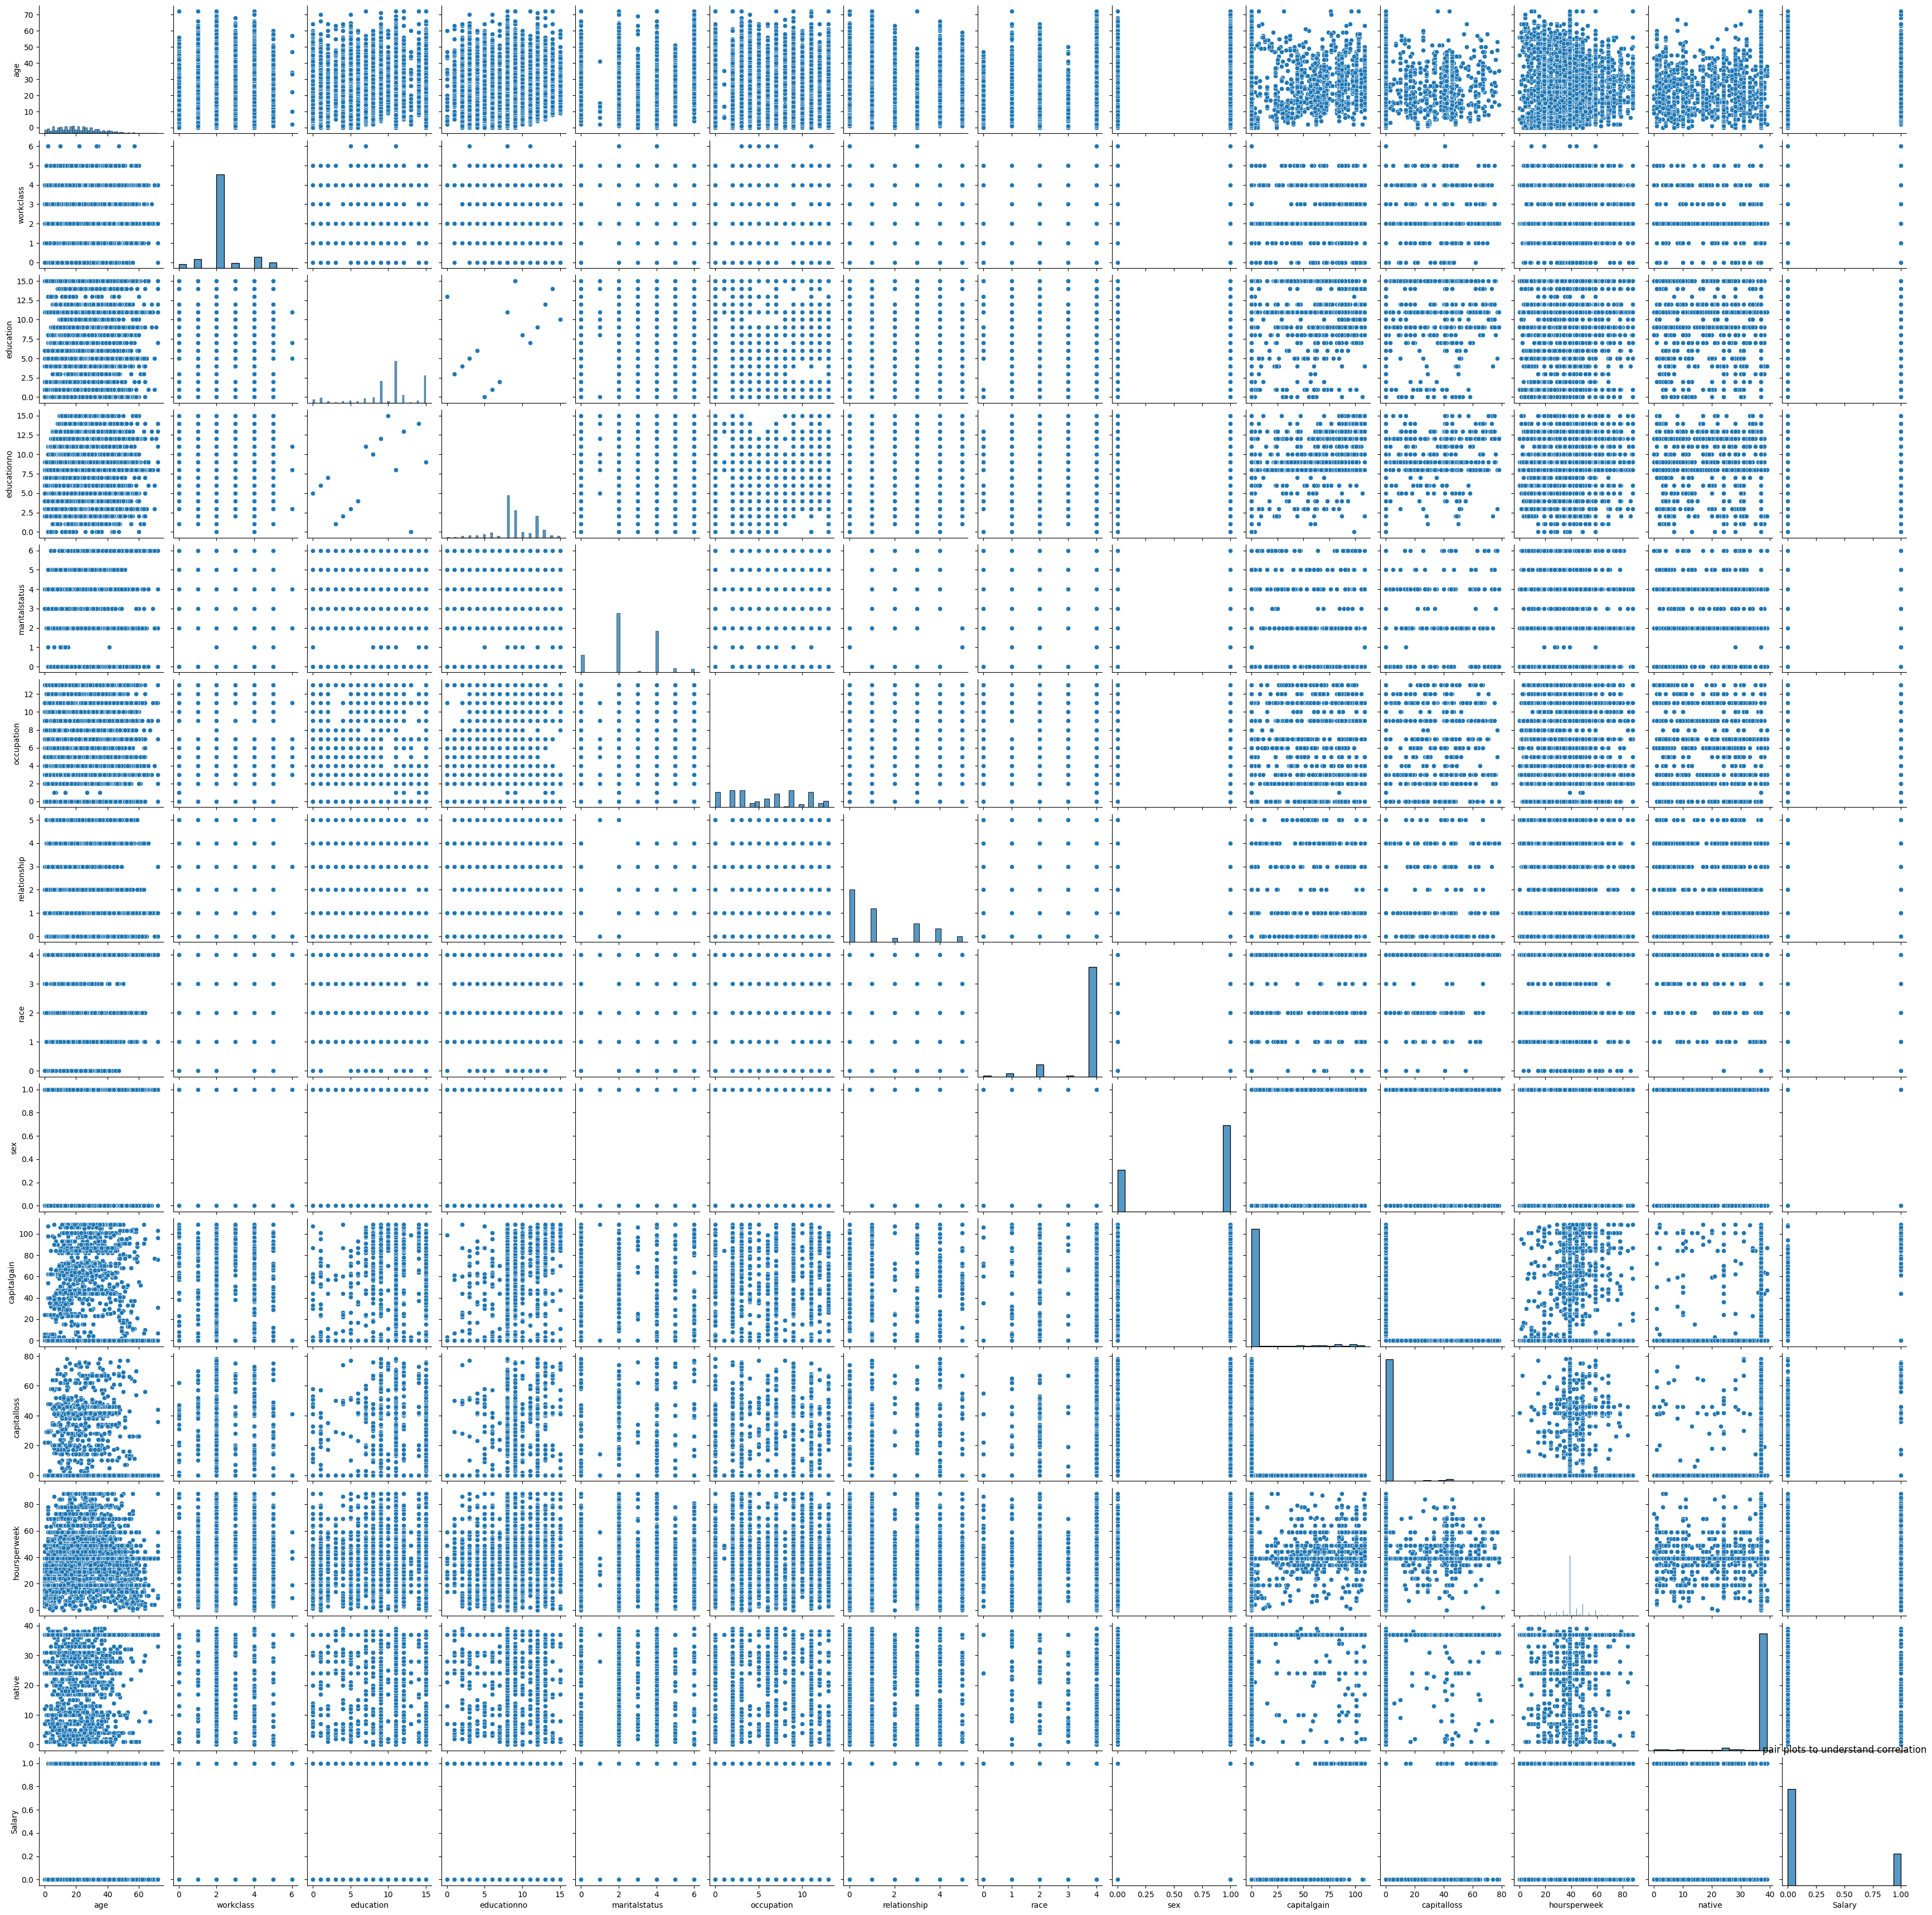

In [ ]:
sns.pairplot(df_test)
plt.title('pair plots to understand correlation')
plt.show()

<Axes: ylabel='count'>

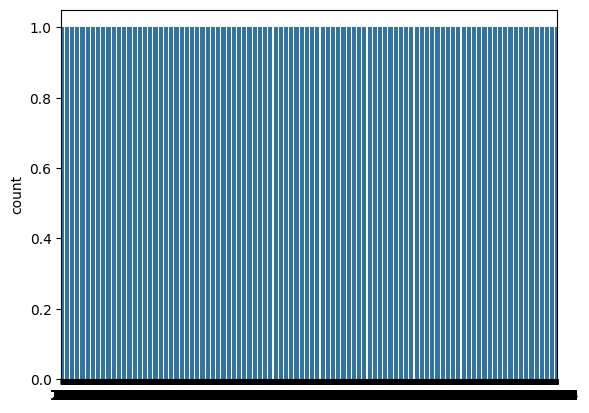

In [ ]:
sns.countplot(df_train['Salary'])

<Axes: ylabel='count'>

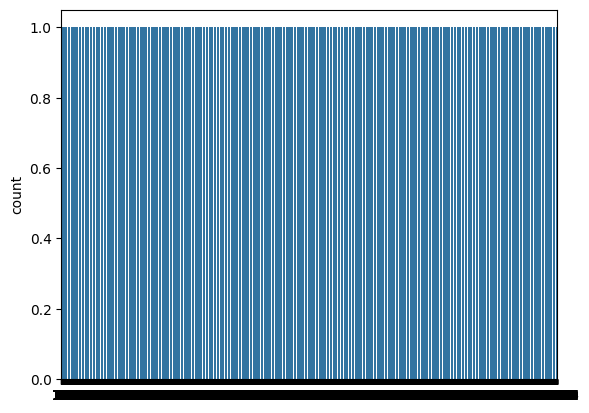

In [ ]:
sns.countplot(df_test['Salary'])